In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df1 = pd.read_csv("olist_customers_dataset.csv")
df2 = pd.read_csv("olist_geolocation_dataset.csv")
df3 = pd.read_csv("olist_order_items_dataset.csv")
df4 = pd.read_csv("olist_order_payments_dataset.csv")
df5 = pd.read_csv("olist_order_reviews_dataset.csv")
df6 = pd.read_csv("olist_orders_dataset.csv")
df7 = pd.read_csv("olist_products_dataset.csv")
df8 = pd.read_csv("olist_sellers_dataset.csv")
df9 = pd.read_csv("product_category_name_translation.csv")

In [4]:
print("Dimensions des datasets :")
print("df1 : {}\ndf2 {}\ndf3 : {}\ndf4 : {}\ndf5 : {}\ndf6 : {}\ndf7 : {}\ndf8 : {}\ndf9 : {} ".format(df1.shape,
         df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape, df9.shape))

Dimensions des datasets :
df1 : (99441, 5)
df2 (1000163, 5)
df3 : (112650, 7)
df4 : (103886, 5)
df5 : (99224, 7)
df6 : (99441, 8)
df7 : (32951, 9)
df8 : (3095, 4)
df9 : (71, 2) 


In [8]:
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
df1['customer_unique_id'].nunique()

96096

In [10]:
print(df1['customer_state'].unique())

['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


In [11]:
print(df2['geolocation_state'].nunique())

27


In [12]:
df1['customer_zip_code_prefix'].nunique()

14994

In [13]:
# Vérifier les valeurs manquantes dans 'customer_zip_code_prefix'
missing_values = df1['customer_zip_code_prefix'].isnull().sum()

# Afficher le nombre de valeurs manquantes
print("Nombre de valeurs manquantes dans 'customer_zip_code_prefix':", missing_values)


Nombre de valeurs manquantes dans 'customer_zip_code_prefix': 0


In [14]:
# Vérifier les valeurs manquantes dans 'customer_state'
missing_values = df1['customer_state'].isnull().sum()

# Afficher le nombre de valeurs manquantes
print("Nombre de valeurs manquantes dans 'customer_state':", missing_values)


Nombre de valeurs manquantes dans 'customer_state': 0


In [15]:
df2.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [16]:
df2['geolocation_zip_code_prefix'].nunique()

19015

In [17]:
print(df2['geolocation_state'].unique())

['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']


In [18]:
print(df2['geolocation_state'].nunique())

27


In [19]:
print(df2['geolocation_city'].unique())

['sao paulo' 'são paulo' 'sao bernardo do campo' ... 'ciríaco' 'estação'
 'vila lângaro']


In [20]:
print(df2['geolocation_city'].nunique())

8011


Le dataset dfé ne nous apporte pas plus d'informations que celles que nous disposons déjà dans df1, nous n'allons donc pas inclure dans la jointure des fichiers. 

In [21]:
df6.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [22]:
df16=pd.merge(df1, df6, on='customer_id', how='outer')
df16.shape

(99441, 12)

In [23]:
df16.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00


In [24]:
df3.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [25]:
print(df3['order_item_id'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [26]:
df4.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [27]:
print(df4['payment_sequential'].unique())

[ 1  2  4  5  3  8  6  7 10 11 17 19 27 12  9 15 13 14 16 25 22 26 29 28
 18 21 24 23 20]


In [28]:
print(df4['payment_installments'].unique())

[ 8  1  2  3  6  5  4 10  7 12  9 13 15 24 11 18 14 20 21 17 22  0 16 23]


In [29]:
df34=pd.merge(df3, df4, on='order_id', how='left')
df34.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [30]:
df34.shape

(117604, 11)

In [31]:
df5.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [32]:
df5.shape

(99224, 7)

In [33]:
df345=pd.merge(df34, df5,  on='order_id', how='inner')
df345.shape

(117332, 17)

In [34]:
df7.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [35]:
df7.shape

(32951, 9)

In [36]:
df3457=pd.merge(df345, df7, on='product_id', how='inner')
#df3457.head(1)

In [37]:
df3457.shape

(117332, 25)

In [38]:
df163457 = pd.merge(df16, df3457, on='order_id', how='inner')
df163457.shape

(117332, 36)

In [39]:
df163457.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [40]:
df8.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [41]:
df1634578 = pd.merge(df163457, df8, on ='seller_id', how='inner')

In [42]:
df1634578.shape

(117332, 39)

In [43]:
df1634578.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [44]:
df1634578['product_category_name'].nunique()

73

In [45]:
df9.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [46]:
df9['product_category_name'].nunique()

71

In [47]:
df16345789 = pd.merge(df1634578, df9, on ='product_category_name', how='inner')

In [48]:
df=df16345789
df.shape

(115612, 40)

In [50]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,955.0,1.0,8267.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,office_furniture
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1066.0,1.0,12160.0,56.0,51.0,28.0,8577,itaquaquecetuba,SP,office_furniture
3,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,...,1128.0,1.0,16133.0,63.0,59.0,25.0,8577,itaquaquecetuba,SP,office_furniture
4,8276de07ef25225d412b8462d73f8664,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:27,2017-04-04 05:55:19,2017-04-13 16:28:06,...,154.0,1.0,2600.0,40.0,45.0,39.0,8577,itaquaquecetuba,SP,office_furniture


In [51]:
df['customer_unique_id'].nunique()

93397

In [52]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115612 entries, 0 to 115611
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115612 non-null  object 
 1   customer_unique_id             115612 non-null  object 
 2   customer_zip_code_prefix       115612 non-null  int64  
 3   customer_city                  115612 non-null  object 
 4   customer_state                 115612 non-null  object 
 5   order_id                       115612 non-null  object 
 6   order_status                   115612 non-null  object 
 7   order_purchase_timestamp       115612 non-null  object 
 8   order_approved_at              115598 non-null  object 
 9   order_delivered_carrier_date   114417 non-null  object 
 10  order_delivered_customer_date  113212 non-null  object 
 11  order_estimated_delivery_date  115612 non-null  object 
 12  order_item_id                 

In [54]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


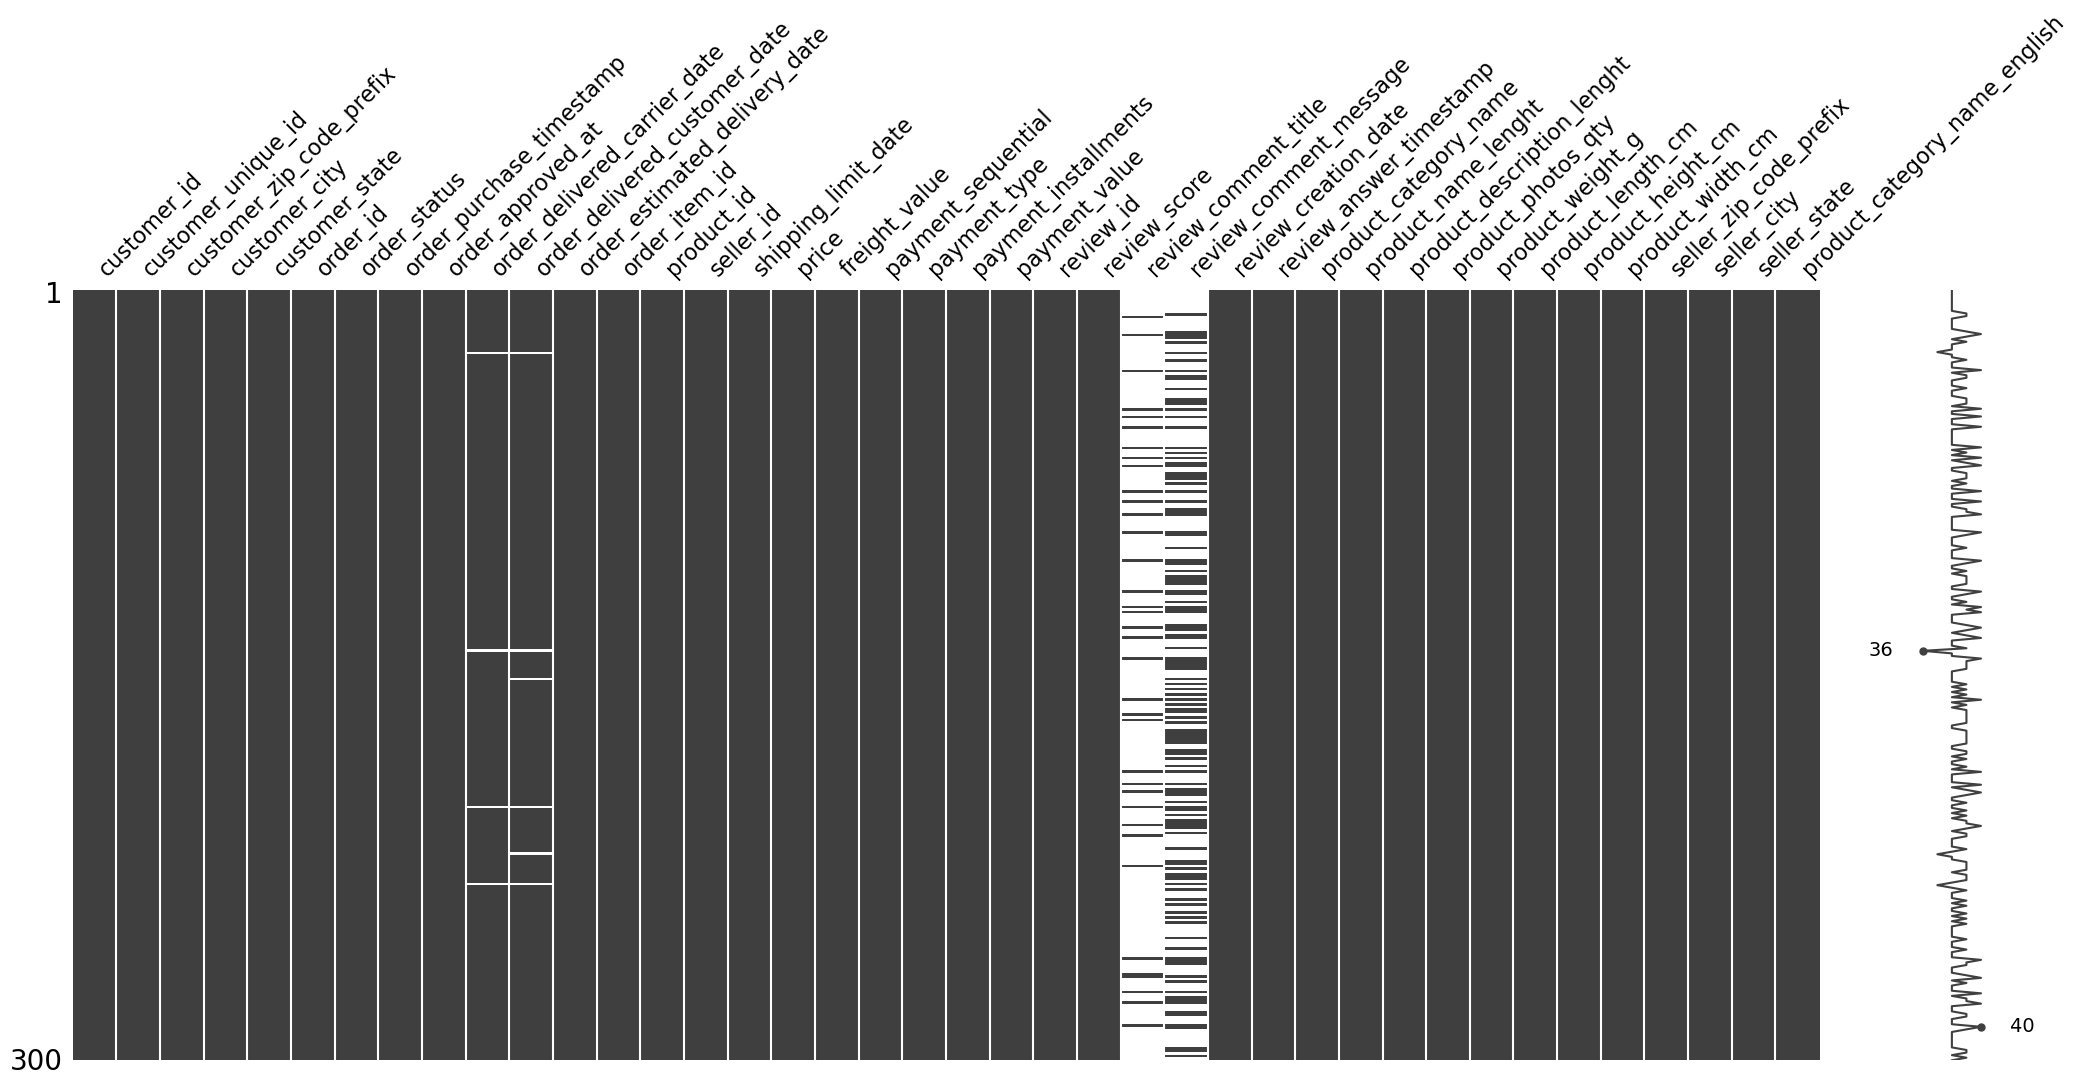

In [55]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(300))
plt.savefig('missingo')

Nous allons commencer une première étape de nettoyage qui Consiste à élimininer les coonnes qui semblent non pertinente pour notre étude

In [56]:
df.drop(['order_status', 'review_comment_title', 'order_approved_at', 'order_delivered_carrier_date', 
       'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'shipping_limit_date',
        'review_id', 'review_creation_date', 'review_answer_timestamp', 'product_name_lenght','product_description_lenght', 
         'seller_city', 'product_category_name_english'
        ], axis =1, inplace =True)

In [57]:
(df.isnull().sum() / df.shape[0] ) * 100

customer_id                  0.000000
customer_unique_id           0.000000
customer_zip_code_prefix     0.000000
customer_city                0.000000
customer_state               0.000000
order_id                     0.000000
order_purchase_timestamp     0.000000
product_id                   0.000000
seller_id                    0.000000
price                        0.000000
freight_value                0.000000
payment_sequential           0.002595
payment_type                 0.002595
payment_installments         0.002595
payment_value                0.002595
review_score                 0.000000
review_comment_message      57.695568
product_category_name        0.000000
product_photos_qty           0.000000
product_weight_g             0.000865
product_length_cm            0.000865
product_height_cm            0.000865
product_width_cm             0.000865
seller_zip_code_prefix       0.000000
seller_state                 0.000000
dtype: float64

In [58]:
df.drop(['review_comment_message', 'product_weight_g', 'product_length_cm', 
         'product_height_cm', 'product_width_cm'], axis=1, inplace= True)

In [59]:
df.shape

(115612, 20)

In [60]:
colonnes_manquantes = df.isnull().any(axis=0)
print(colonnes_manquantes)

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
order_id                    False
order_purchase_timestamp    False
product_id                  False
seller_id                   False
price                       False
freight_value               False
payment_sequential           True
payment_type                 True
payment_installments         True
payment_value                True
review_score                False
product_category_name       False
product_photos_qty          False
seller_zip_code_prefix      False
seller_state                False
dtype: bool


In [61]:
lignes_manquantes = df.isnull().any(axis=1)
print(lignes_manquantes)


0         False
1         False
2         False
3         False
4         False
          ...  
115607    False
115608    False
115609    False
115610    False
115611    False
Length: 115612, dtype: bool


In [62]:
indexes_lignes_manquantes = df[lignes_manquantes].index
print(indexes_lignes_manquantes)

Int64Index([80355, 80356, 80357], dtype='int64')


In [63]:
df.drop(indexes_lignes_manquantes, inplace=True)


Notre dataset est ainsi néttoyé, nous allons pouvoir entamer l'analyse exploratoire

In [64]:
df.describe()#include='all')

,customer_zip_code_prefix,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_photos_qty,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,120.619850,20.056880,1.093747,2.946233,172.387379,4.034409,2.205373,24515.713958
std,29841.671732,182.653476,15.836184,0.729849,2.781087,265.873969,1.385584,1.717771,27636.640968
min,1003.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1001.000000
25%,11310.000000,39.900000,13.080000,1.000000,1.000000,60.870000,4.000000,1.000000,6429.000000
50%,24241.000000,74.900000,16.320000,1.000000,2.000000,108.050000,5.000000,1.000000,13660.000000
75%,58745.000000,134.900000,21.210000,1.000000,4.000000,189.480000,5.000000,3.000000,28605.000000
max,99980.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,20.000000,99730.000000


Comme la variable 'payment_value' représente le somme totale payée par le client, nous supprimons les lignes des colonnes qui devrais avoir des valeurs inférieur à 'payment_value'. 

In [65]:
df = df[(df['payment_installments'] <= df['payment_value']) & (df['price'] <= df['payment_value'])]
df.shape

(109303, 20)

In [66]:
numerical_cols = ['customer_zip_code_prefix', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score', 
                 'product_photos_qty', 'seller_zip_code_prefix' ]

In [67]:
# Nous vrifieons s'il y a des valeurs négatives dans le DataFrame
has_negative_values = (df[numerical_cols] < 0).any().any()

if has_negative_values:
    print("Le DataFrame contient des valeurs négatives.")
else:
    print("Le DataFrame ne contient pas de valeurs négatives.")


Le DataFrame ne contient pas de valeurs négatives.


In [68]:
df['review_score'].unique()

array([4, 5, 1, 2, 3], dtype=int64)

Pour l'étude de notre segementation, nous utliserons des algorithmes sensibles aux valeurs aberrantes, nous allons donc les supprimer 

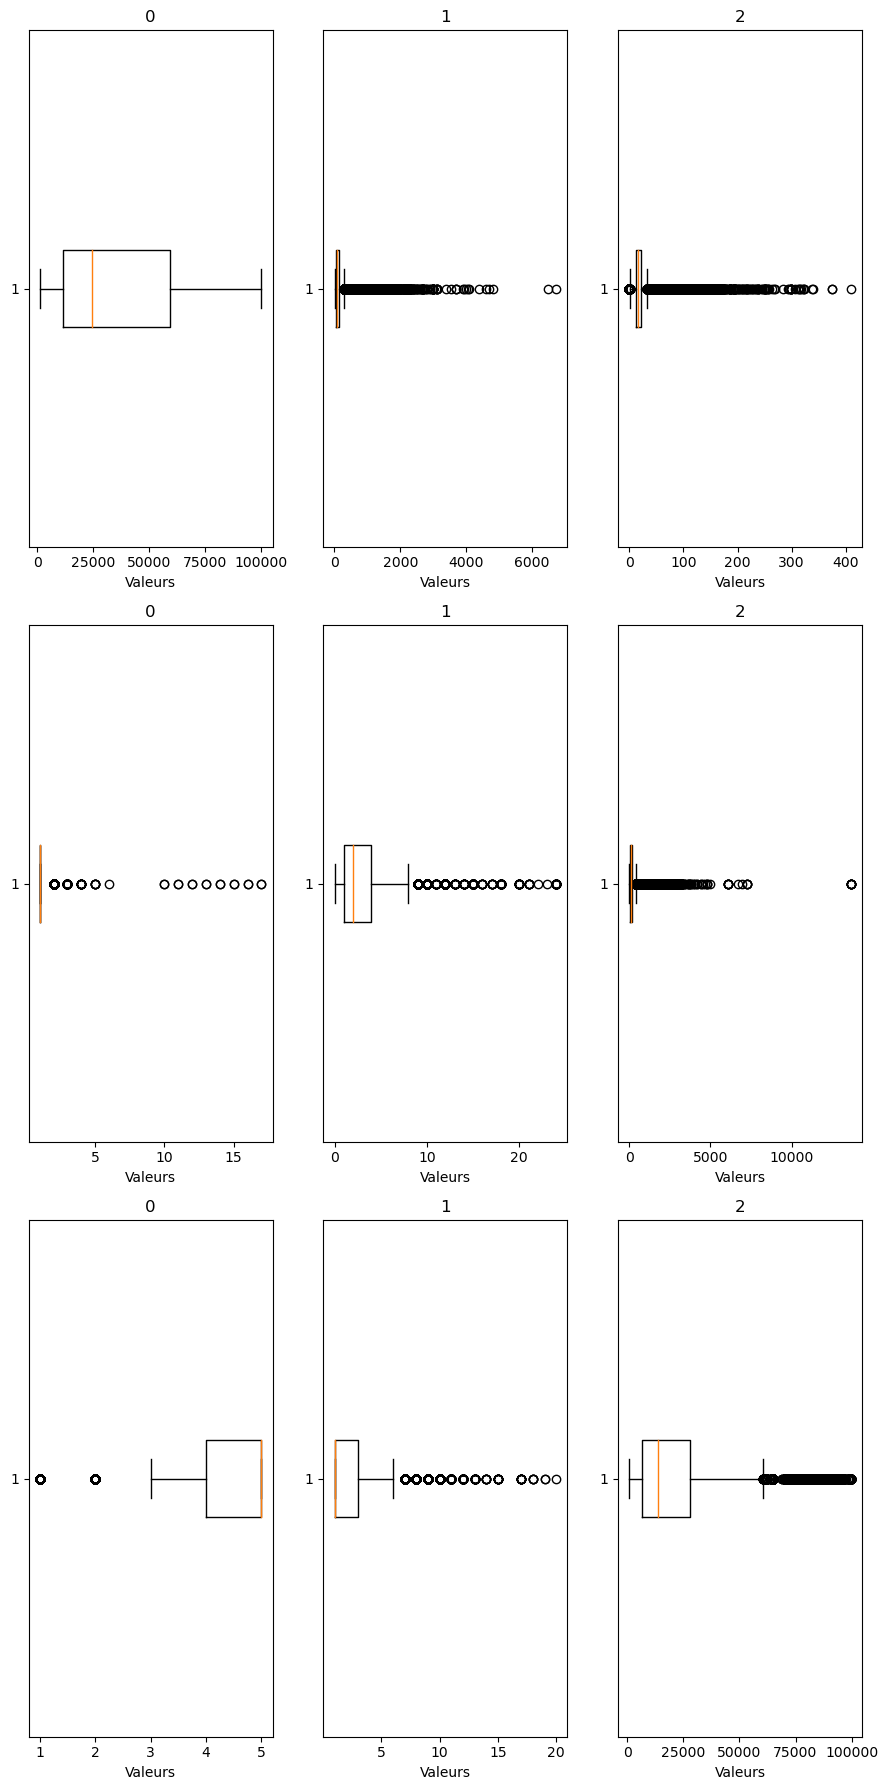

In [69]:
import matplotlib.pyplot as plt
import math

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(numerical_cols) / 3)

# Créer une figure et un ensemble d'axes
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(9, 6*num_rows))

# Tracer les boxplots pour chaque variable
for i, col in enumerate(numerical_cols):
    row = i // 3
    col = i % 3
    axes[row, col].boxplot(df[numerical_cols[i]].values, vert=False)
    axes[row, col].set_title(col)
    axes[row, col].set_xlabel("Valeurs")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.savefig('boxplot')
# Afficher le graphique
plt.show()


In [70]:
# Seuils pour chaque variable numérique
thresholds = {
    'price': (0.850000, 6735.000000),
    'freight_value': (0.000000, 409.680000),
    'payment_sequential': (1.000000, 29.000000),
    'payment_installments': (0.000000, 24.000000),
    'payment_value': (0.000000, 13664.080000),
    'review_score': (1.000000, 5.000000),
    'product_photos_qty': (1.000000, 20.000000),
    'seller_zip_code_prefix': (1001.000000, 99730.000000)
}

# Fonction pour supprimer les outliers
def remove_outliers(df, column, lower_threshold, upper_threshold):
    df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]
    return df

# Supprimer les outliers pour chaque variable
for column in numerical_cols:
    if column in thresholds:
        lower_threshold, upper_threshold = thresholds[column]
        df = remove_outliers(df, column, lower_threshold, upper_threshold)


In [71]:
df.shape

(109303, 20)

In [72]:
# Fonction pour supprimer les outliers basés sur les écarts interquartiles (IQR)
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    return df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]

for column in numerical_cols:
    df = remove_outliers_iqr(df, column)


In [73]:
df.shape

(58060, 20)

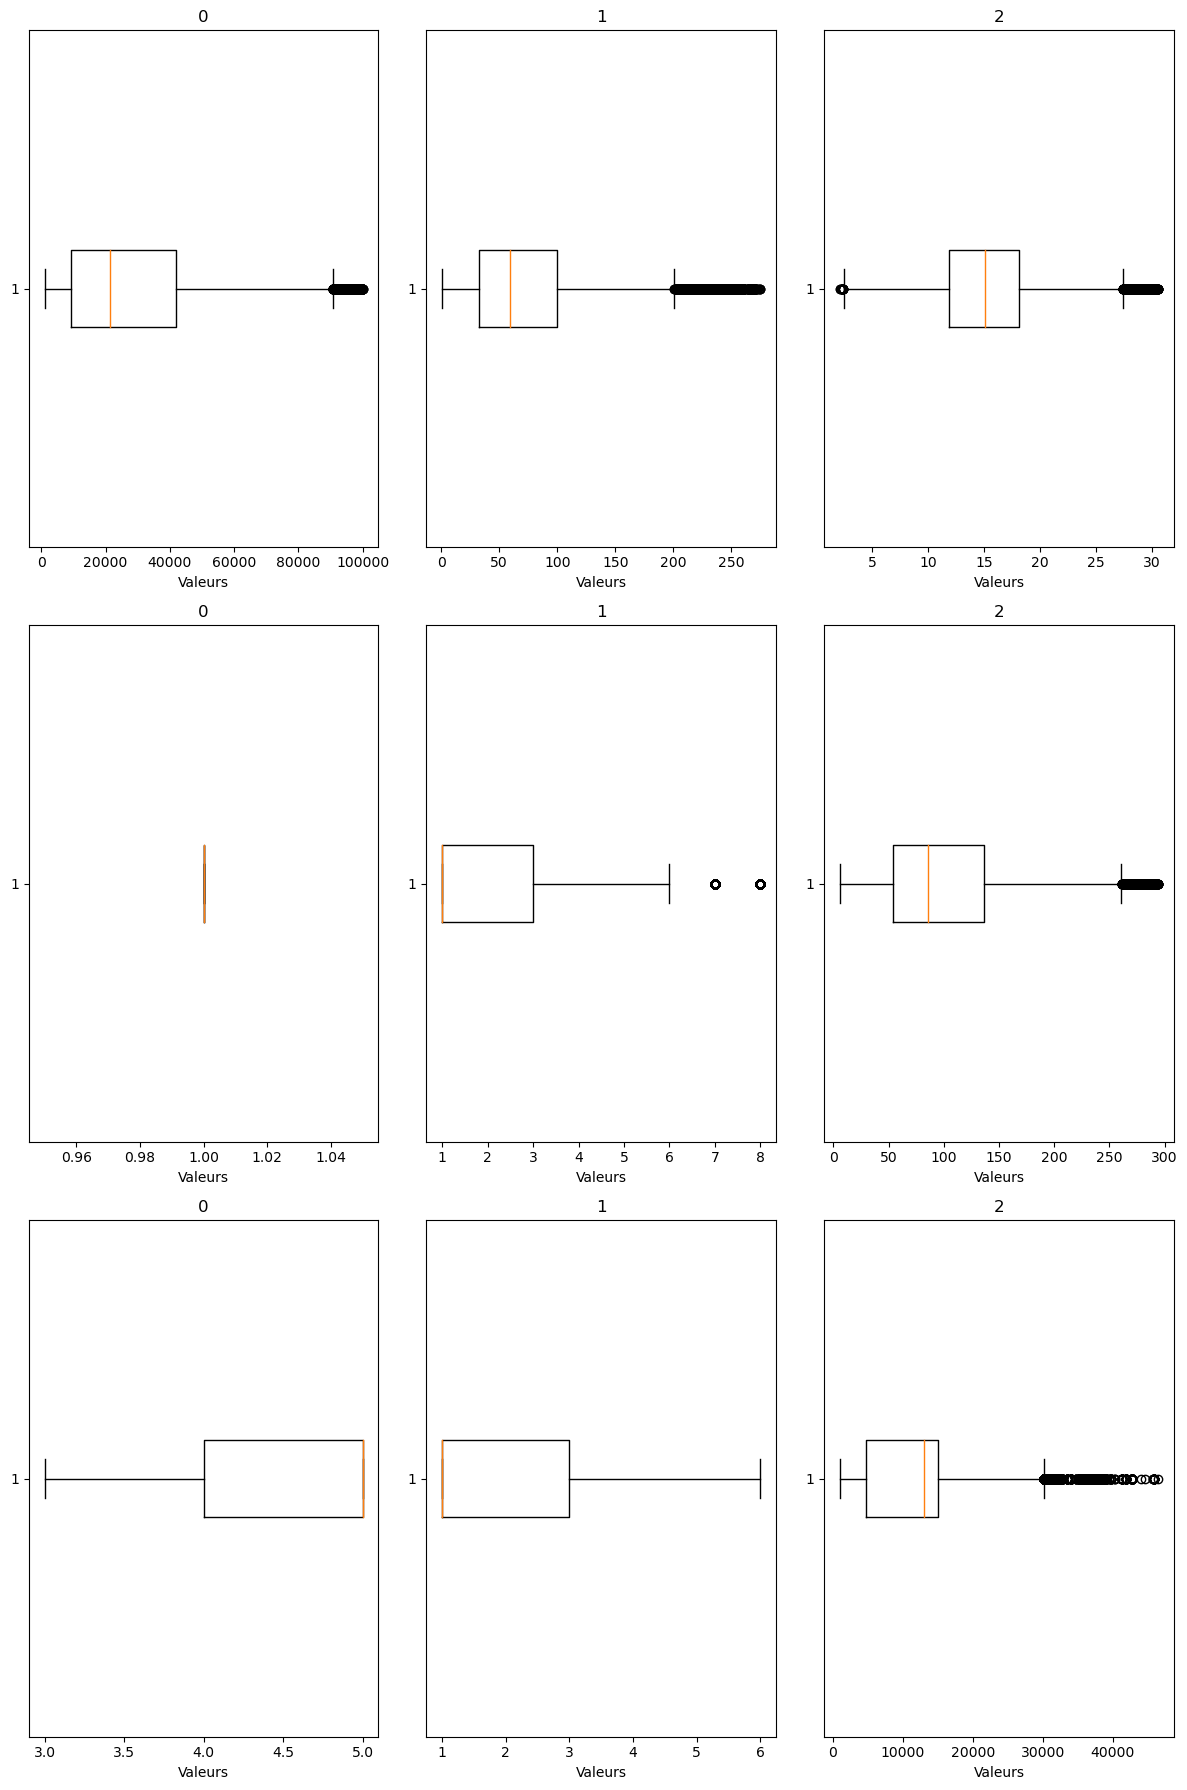

In [74]:
# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(numerical_cols) / 3)

# Créer une figure et un ensemble d'axes
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 6*num_rows))

# Tracer les boxplots pour chaque variable
for i, col in enumerate(numerical_cols):
    row = i // 3
    col = i % 3
    axes[row, col].boxplot(df[numerical_cols[i]].values, vert=False)
    axes[row, col].set_title(col)
    axes[row, col].set_xlabel("Valeurs")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

Certains outliers persistent, nous allons ajuster le seuil de chaque variable afin d'en éliminer le maximum

In [75]:

thresholds = {
    'price': 1.5,
    'freight_value': 1.5,
    'payment_sequential': 1.5,
    'payment_value': 1.5,
    'seller_zip_code_prefix': 1.5
}

# Fonction pour supprimer les outliers
def remove_outliers_iqr(df, column, threshold):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_threshold = q1 - threshold * iqr
    upper_threshold = q3 + threshold * iqr
    return df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]

# Supprimer les outliers pour chaque variable
for column in numerical_cols:
    if column in thresholds:
        threshold = thresholds[column]
        df = remove_outliers_iqr(df, column, threshold)


In [76]:
df.shape

(49332, 20)

In [77]:
# Compter le nombre de commandes par client
customer_order_counts = df.groupby("customer_unique_id")["order_id"].count()
customer_order_counts.unique()

array([ 1,  2,  3,  4,  5,  6,  9,  8,  7, 12, 11], dtype=int64)

In [78]:
df["customer_order_counts"] = df["customer_unique_id"].map(customer_order_counts)

In [79]:
df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,product_id,seller_id,price,...,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,product_photos_qty,seller_zip_code_prefix,seller_state,customer_order_counts
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,...,1.0,credit_card,2.0,146.87,4,moveis_escritorio,1.0,8577,SP,1
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,...,1.0,credit_card,7.0,157.73,5,moveis_escritorio,1.0,8577,SP,1
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,...,1.0,credit_card,1.0,173.30,5,moveis_escritorio,1.0,8577,SP,1


Nous allons maintenant garder que les client ayant effectué plusieurs commandes

In [80]:
df_filtered = df.loc[df['customer_order_counts'] > 1]
df_filtered.shape

(9259, 21)

In [81]:
df_filtered.to_csv('df.csv', index=False)